# Capstone Analysis

# Import Python Packages

In [3]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import rpy2
from sklearn.model_selection import train_test_split, GridSearchCV
import pandasql as sql



# Import R Packages

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R

##R Packages that were needed to run Stanford's Code

install.packages("plyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("cowplot")
install.packages("corrplot")
install.packages("caret")
install.packages("randomForest")
install.packages("limma")
install.packages("locfit")
install.packages("splines")
install.packages("KernSmooth")
install.packages("statmod")
install.packages("MASS")
install.packages("exactRankTests")
install.packages("pROC")
install.packages("effsize")





In [ ]:
%%R
install.packages("statmod")
install.packages("Rcpp")

In [ ]:
%%R

source("https://bioconductor.org/biocLite.R")
biocLite("DESeq2")
biocLite("edgeR")


# Data Preparation

<b> *Need to Site Source here*! <b> We are using R to conduct the data cleaning and merging that Stanford used. By using R, we can keep the code very similar to the original code for data processing.  We will use their data preparation with a few modifications, but continue the analysis using Python once we have a file to analyze.  Below is the R code that Stanford shared for two datasets. Once we have the final dataframes in R, we can convert this dataframe from R to Python within this notebook for the rest of the analysis. 

# Data Set 1

The below code imports the rna sequence count spreadsheet and normalizes the data using the EdgeR package.  Stanford researchers did statistical tests for feature signficance, but we will do something else to choose features.  I will comment out the code for the statistical tests that they did and normalize the entire dataset. 

In [ ]:
%%R 

library('edgeR')
library('limma')
library('locfit')
library('splines')
library('KernSmooth')
library('statmod')
library('MASS')
library('dplyr')

#Set working directory
mainDir = 'C:/Users/Jonathan/Desktop/pregnancy_cfRNA/' #CHANGE this to reflect the main directory you've selected
setwd(mainDir)


#Get raw data
rawdata = read.csv("raw_data/rnaseq_counts.csv")
group = factor(c(rep(1, 7), rep(2,8)))  #1 = Term, 2 = Preterm

y = DGEList(counts=rawdata[,2:ncol(rawdata)], genes=rawdata[,1],group=group)
keep = rowSums(cpm(y)>1) >= 2
y = y[keep,]

y$samples$lib.size = colSums(y$counts)

delivery = group
data.frame(Sample=colnames(y),delivery)

design = model.matrix(~0+delivery)
rownames(design) = colnames(y)

y = estimateGLMCommonDisp(y, design, verbose=TRUE)
y = estimateGLMTrendedDisp(y,design)
y = estimateGLMTagwiseDisp(y,design)

#Exact Test
#et = exactTest(y)
#et_tags = topTags(et, n=200)$table %>% filter(PValue < 0.001)

#GLM
#fit = glmFit(y, design)
#contrast.design= c(1,-1)
#lrt = glmLRT(fit, contrast=contrast.design)
#glm_tags = topTags(lrt, n = 200)$table %>% filter(PValue < 0.001)

#QL F-test
#fit = glmQLFit(y, design)
#contrast.design=c(1,-1)
#qlf = glmQLFTest(fit, contrast=contrast.design)
#qlf_tags = topTags(qlf, n=200)$table  %>% filter(PValue < 0.001)

#Merge tests
#top_genes = Reduce(intersect, list(et_tags$genes, glm_tags$genes, qlf_tags$genes))

#Normalize data
rawdata_norm = as.data.frame(t(t(rawdata[,-1])/colSums(rawdata[,-1])*1000000))

###ADDED BY JONATHAN MARIN TO ADD LABELS TO NORMALIZED DATA
rawdata_norm_labels = cbind(rawdata$external_gene_name, rawdata_norm)


In [ ]:
%%R -o counts_all

rawdata_norm_labels <- dataset1



In [4]:
#python dataframe
rawdata_norm_labels = pd.read_csv('rawdata_norm_labels.csv', nrows = None)

In [5]:
rawdata_norm_labels = rawdata_norm_labels.rename(index=str, columns = {"rawdata$external_gene_name":"Gene_Name"})

In [6]:
rawdata_norm_labels

,Gene_Name,T_Penn_3,T_Penn_6,T_Penn_8,T_Penn_9,T_Penn_14,T_Penn_16,T_Penn_27,PT_Penn_15,PT_Penn_17,PT_Penn_18,PT_Penn_24,PT_Penn_25,PT_Penn_28,PT_Penn_4,PT_Penn_10
0,RP11-460H9.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,C2orf76,0.000000,4.014262,0.000000,2.926681,0.000000,8.746643,0.000000,0.000000,0.000000,2.468740,0.000000,1.218791,0.000000,11.771215,3.025604
2,ACTL10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CEP135,13.864722,41.748323,33.364752,45.363552,21.181704,76.220750,16.504101,46.756871,57.996230,71.593448,11.338254,32.907366,54.647795,23.542429,46.728768
4,AC005609.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,RP11-613M10.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,NDUFB5P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,MIIP,0.000000,12.042786,16.682376,23.413446,30.595794,8.746643,33.008203,3.596682,7.249529,9.874958,11.338254,39.001322,0.000000,0.000000,11.430058
8,RP11-578O24.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,PRSS3P4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#transposed_rawdata_norm.set_index('Gene_Name',inplace=True)

transposed_rawdata_norm = rawdata_norm_labels.transpose()

In [8]:
transposed_rawdata_norm

,0,1,2,3,4,5,6,7,8,9,...,59407,59408,59409,59410,59411,59412,59413,59414,59415,59416
Gene_Name,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,RP11-578O24.2,PRSS3P4,...,CLN6,RP11-500C11.3,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P
T_Penn_3,0,0,0,13.8647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_Penn_6,0,4.01426,0,41.7483,0,0,0,12.0428,0,0,...,8.02852,0,0,0,0,0,0,0,0,0
T_Penn_8,0,0,0,33.3648,0,0,0,16.6824,0,0,...,0,0,0,0,0,0,0,0,0,0
T_Penn_9,0,2.92668,0,45.3636,0,0,0,23.4134,0,0,...,0,0,1.46334,0,0,0,0,0,0,0
T_Penn_14,0,0,0,21.1817,0,0,0,30.5958,0,0,...,7.06057,0,0,0,0,0,0,0,0,0
T_Penn_16,0,8.74664,0,76.2208,0,0,0,8.74664,0,0,...,8.74664,0,0,0,0,0,0,0,0,0
T_Penn_27,0,0,0,16.5041,0,0,0,33.0082,0,0,...,0,0,0,0,0,0,0,0,0,0
PT_Penn_15,0,0,0,46.7569,0,0,0,3.59668,0,0,...,0,0,0,0,0,0,0,0,0,0
PT_Penn_17,0,0,0,57.9962,0,0,0,7.24953,0,0,...,16.9156,0,0,0,0,0,0,0,0,0


In [9]:
transposed_rawdata_norm.columns = transposed_rawdata_norm.iloc[0]

In [10]:
transposed_rawdata_norm = transposed_rawdata_norm.drop(transposed_rawdata_norm.index[0])

In [11]:
transposed_rawdata_norm.columns[0]

'RP11-460H9.1'

In [12]:
transposed_rawdata_norm['index'] = transposed_rawdata_norm.index

In [13]:
transposed_rawdata_norm = transposed_rawdata_norm.reset_index(drop = False)

In [14]:
transposed_rawdata_norm.index.names = ['index']

In [15]:
transposed_rawdata_norm =transposed_rawdata_norm.rename(index=str, columns={"level_0": "Patient"})

In [16]:
transposed_rawdata_norm.to_csv('transposed_rawdata_norm.csv', index = False)

In [17]:
transposed_rawdata_norm['preterm_ind'] = np.where(transposed_rawdata_norm['Patient'].str.contains("PT") == True, 1, 0)

In [18]:
transposed_rawdata_norm.reset_index(drop = True)

Gene_Name,Patient,RP11-460H9.1,C2orf76,ACTL10,CEP135,AC005609.2,RP11-613M10.6,NDUFB5P1,MIIP,RP11-578O24.2,...,CTBP2P7,ITIH2,RBPMSLP,ABCA8,RNU6-280P,PRAMEF7,RNU6-545P,RNU6-318P,index,preterm_ind
0,T_Penn_3,0,0,0,13.8647,0,0,0,0,0,...,0,0,0,0,0,0,0,0,T_Penn_3,0
1,T_Penn_6,0,4.01426,0,41.7483,0,0,0,12.0428,0,...,0,0,0,0,0,0,0,0,T_Penn_6,0
2,T_Penn_8,0,0,0,33.3648,0,0,0,16.6824,0,...,0,0,0,0,0,0,0,0,T_Penn_8,0
3,T_Penn_9,0,2.92668,0,45.3636,0,0,0,23.4134,0,...,1.46334,0,0,0,0,0,0,0,T_Penn_9,0
4,T_Penn_14,0,0,0,21.1817,0,0,0,30.5958,0,...,0,0,0,0,0,0,0,0,T_Penn_14,0
5,T_Penn_16,0,8.74664,0,76.2208,0,0,0,8.74664,0,...,0,0,0,0,0,0,0,0,T_Penn_16,0
6,T_Penn_27,0,0,0,16.5041,0,0,0,33.0082,0,...,0,0,0,0,0,0,0,0,T_Penn_27,0
7,PT_Penn_15,0,0,0,46.7569,0,0,0,3.59668,0,...,0,0,0,0,0,0,0,0,PT_Penn_15,1
8,PT_Penn_17,0,0,0,57.9962,0,0,0,7.24953,0,...,0,0,0,0,0,0,0,0,PT_Penn_17,1
9,PT_Penn_18,0,2.46874,0,71.5934,0,0,0,9.87496,0,...,0,2.46874,0,0,0,0,0,0,PT_Penn_18,1


In [19]:
X1 = transposed_rawdata_norm.drop(['preterm_ind','Patient','index'], axis = 1)

In [21]:
X1 = X1.reset_index(drop = True)

In [22]:
y1 = transposed_rawdata_norm['preterm_ind']

# Data 1 Feature Importance


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [24]:
model = ExtraTreesClassifier()

In [25]:
model.fit(X1,y1)

C:\Users\Jonathan\Anaconda3\envs\rstudio\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

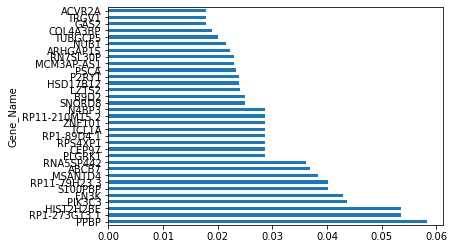

In [28]:
(pd.Series(model.feature_importances_, index=X1.columns)
   .nlargest(33)
   .plot(kind='barh'))

# Data 2


In [29]:
data2 = pd.read_csv("counts_per_ml_PA_UAB.csv")

There are columns with nothing but NaNs.  Going to drop these columns. 

In [30]:
data2 = data2.dropna(axis =1, how = 'all')

In [31]:
data2['preterm_ind'] =  np.where(data2['delivery'] >= 37, 0, 1)

In [32]:
data2 = data2.drop(['sample_number', 'sample_id', 'panel', 'cohort'], axis = 1)  ##don't need sample number nor sample_id

In [33]:
X2 = data2.drop(['delivery', 'preterm_ind'], axis =1 )

In [34]:
y2_regressor = data2['delivery']
y2_classifier = data2['preterm_ind']

In [35]:
from sklearn.preprocessing import normalize

In [36]:
X2_normalized = normalize(X2, norm = 'l2')

In [37]:
X2_normalized = pd.DataFrame(data = X2_normalized, columns = X2.columns)

# Data2 Feature Importance

In [38]:
model2 = ExtraTreesClassifier()

In [39]:
model2.fit(X2_normalized,y2_classifier)

C:\Users\Jonathan\Anaconda3\envs\rstudio\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

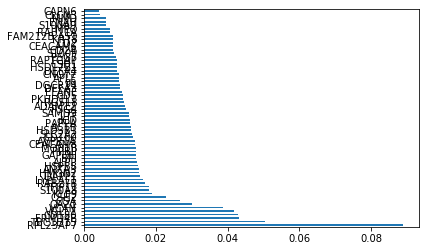

In [40]:
(pd.Series(model2.feature_importances_, index=X2_normalized.columns)
   .nlargest(62)
   .plot(kind='barh'))

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model2, X2_normalized, y2_classifier, cv = 5)

In [56]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.28)


## Visual Analysis

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X1, y1, cv = 5)

In [48]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.40)
